Available Themes: 
- chesterish
- grade3
- gruvboxd
- gruvboxl
    color beach, letras negras
- monokai
- oceans16
- onedork
- solarizedd
- solarizedl
    color beach mas claro

In [1]:
# !jt -l
# !jt -t solarizedl -T
# !jt -r

## Listado de cosas pendientes




__Clusterings a desarrollar__
1. [X] Clustering RFM+
2. [ ] Clustering RF KG Valoración
3. [ ] Clustering RFM KG Valoración
4. [ ] Clustering RFM KG Valoración





__Pasos RFM__
1. [X] Data Customer All
2. [X] Data Facturas All
3. [X] Construcción Caracteristicas a usar
    - [X] Un modelo por cada week tipe
    - [X] Modelo que reemplza W por $C_W$
3. [X] Dispersión puntos RFM
4. [X] Modelo Clustering de R+FM
    - [X] Defionir R, aparte
    - [X] Defionir FxM
    - [X] Calcular Clustering FxM
5. [ ] Descripción del Cluster contruido por R+FM


## Apuntes


La disposicipon de pago, se construye por etapas.

1. [ ] Se define el modelo de regresión general:
   1. [ ] Como forma introductoria **qué es** (Ecuación).
   2. [ ] Se presenta un rago de precios para este modelo de regresión, por medio de un grafico de dispersión.
   3. [ ] Explicación de lo que representan los coeficientes del modelo.
   4. [ ] Diferencias entre la interpretación de estos si es Log()/Nivel.
2. [ ] Se recoge el atributo del modelo llamado Semanas, estas Poseen la particularidad de influir en el precio, como se mencionó anteriormente, es por ello que se adieren en el modelo.
3. [ ] Las semanas.

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
file_direct_Result_Data="C:/Users/user/Documents/Data/Data Resultante/"+Zona_df+"/"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

#### Base Generales

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Propios

In [10]:
import data_read as dr
import R_FM_Func

### Funciones Propias
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

#### Numero a Meses 

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [11]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

#### Función estandariza ciertas columnas a LN 

In [12]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
            print(s)
            df_x[s + '(Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
    if(drop_columns):
        df_x.drop(columns = ln_col)
    return(df_x)

## Dicionario 
rename aplicado a `Precio promedio`

In [13]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

[Link colores muestra y configuración](https://www.rapidtables.com/web/color/RGB_Color.html)

In [14]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_rfm`: Facturaciones 
- `Data_Customers_Full`: Clientes con todos los atributos
<!-- - `Df_Week`: Semanas, Con su respectivo cluster  -->

### Factuas con Week Tipe
`data_rfm`

In [15]:
data_rfm=dr.RFM_Data_func(file_direct_O)
data_rfm=dr.Ajuste_data_RFM(data_rfm)
data_rfm=dr.Merge_Week(file_direct_O,data_rfm)


C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT R.csv
R (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT F.csv
F (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT M.csv
M (198596, 20)
------------------------------------------------
Merge
RF (198596, 20)
RFM (198596, 22)
Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary       

## Data Clientes
`Data_Customers_Full`


### RFM
`Customers_data`

In [18]:
Customers_data=dr.Customers_csv_RFM(file_direct_O)
Customers_data=dr.Ajuste_Clientes_RFM(Customers_data)
Customers_data.head()

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object


,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


### Val
`df_VC`

In [16]:
df_VC=dr.Val_Clientes_weeks(file_direct_O)

Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
dtype: object


### Data Customers Full
`Data_Customers_Full`

In [19]:
print(df_VC.shape
,Customers_data.shape
,len(data_rfm.Cliente.unique()))
Data_Customers_Full=dr.Customer_KG_Mean(data_rfm,Customers_data,df_VC).head()
print(Data_Customers_Full.shape)
Data_Customers_Full.dtypes

(5073, 11) (5073, 10) 5073
Cliente                0
Ticket std Actual    367
dtype: int64
(5073, 13)
(5073, 23)
(5073, 24)
(5, 24)


Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
Fecha ultima Compra                             object
Recency Actual                                   int64
Fecha Creacion                                  object
Frecuency Actual del Cliente                   float64
Kilos Venta KG Promedio                        float64
Precio Promedio                                float64
Año Creación Promedio                            int64
Frecuencia

# Data solo RFM  

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`


- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency
- `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

#### Apuntes 

##### Funciones
1. Ajuste De Datos
   - Estado R
     - `Estado_R(X)` por apply
     - DF_Estado_R(DF) ajusta directamnte el DF ingresado
   - `data_Min_Max(dx,Min_Max_col,drop_columns)`
     > Entrega un df copiado
     >> Ajusta las columnas del arreglo Min_Max_col
     
     - dx dataframe
     - Min_Max_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado
   - `data_ln(dx,ln_col,drop_columns)`
    
        >Pasa un listado de columnas a Ln y entrga una copia del dataframe
     - dx: dataframe
     - ln_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado

   - `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

      > Entrega una copia del df:
       >>con una nueva columna llamda $(F \times W_F + M \times W_M)$

     - W_F pond de F
     - W_M pond de M
     - Col_FM:(F,M)
2. Ajuste de K-means
   - `Curva_kmeans(D_Clientes_Frec,Col)`
       >Permite definir el numero de K segmentos de K-means.
3. Proceso de Clustering K-means
   - `def_Col_cluster(D_Clientes, Col, Numero_de_clusters, ln_Col_tra=False)`

   >Entrega(DataFrame):
   >>Una copia del dataframe `D_Clientes` Con una columna adicional llamada `identified_clusters` con los el cluster que pertenece cada cliente.(Cada fila).

   > - D_Clientes: Dataframe a clusterizar (pd.DataFrame)
   > - Col: Columnas utilizadas para el clustering (Array)
   > - Numero_de_clusters: K segmentos a generar (int)
   > - ln_Col_tra=False: Si las columnas ya fueron ajustadas con Ln (Bulean logical value)

## Datos y columnas 

### Columnas y Data


Se toma el data frame `Clientes_i` seleccionado las columnas RFM custom mas id cliente
y se guarda en `RFM_Customers`

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`

##### Columnas 

###### Data clientes

In [36]:
Clientes_i.head()

,Cliente,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,%△Valoración Promedio \n Tipo de Semana 3,%△Valoración Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio \n Tipo de Semana 0,Kilos Venta KG Promedio \n Tipo de Semana 1,Kilos Venta KG Promedio \n Tipo de Semana 2,Kilos Venta KG Promedio \n Tipo de Semana 3,...,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,22.0,22.0,22.0,22.0,...,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,-0.007185734905445153,0.018077218717184977,0.013714992109052858,0.02452918655320076,0.013855960433295756,89.87777777777778,96.475,95.56060606060606,90.2,...,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,0.03046114456733656,0.019897886066589765,0.03147219540210185,0.0056993826680127755,0.0007512242388005607,21.941176470588236,22.263157894736842,22.0,22.0,...,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,-0.030060387249354177,0.05214065915513532,0.02113362816776547,0.012619280144029242,0.007263220502570363,25.142857142857142,29.333333333333332,30.8,27.919047619047618,...,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,-0.026308968642914484,-0.05027185123667554,0.01544649662663542,-0.07753219431426499,-0.0346666293918049,22.0,22.0,22.0,22.0,...,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334


###### Columnas RFM

`Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']]`

In [37]:
Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']]

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual
0,10003742,521,0.003344,28600.000000
1,10007508,0,0.201752,117683.471154
2,10017269,3,0.059365,29699.448718
3,10023880,47,0.039591,38390.000000
4,10028999,32,0.017541,29060.307692
...,...,...,...,...
5068,9992154,69,0.056885,46135.600000
5069,9993925,0,0.408158,200374.351750
5070,9994662,12,0.015996,28700.000000
5071,9994800,118,0.025931,27060.000000


##### Copia especifica

Se copia  
`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`

In [38]:
RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()

# Funciones de ajuste py 

`RFM_Customers`

In [40]:
import R_FM_Func
# obj_1=R_FM_Func.Class_R_Estados()

In [21]:
#Copio el data frame solo con las columnas de interes,
#  además contruyo el atributo Estado
RFM_Customers=\
R_FM_Func.DF_Estado_R(
    Data_Customers_Full[['Cliente']+Dic_col['RFM Customers']].copy()
                )

In [22]:
Col_FM=['Frecuency Actual del Cliente','Monetary Actual']          
RFM_Customers=\
R_FM_Func.data_Min_Max(
   R_FM_Func.data_ln(
       RFM_Customers,Col_FM,False)
   ,[c + ' (Escala ln)' for c in Col_FM]
   ,True)
RFM_Customers.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Escala Min Max),Monetary Actual (Escala ln) (Escala Min Max)
0,10003742,521,0.003344,28600.000000,Fugado,0.000000,0.000000
1,10007508,0,0.201752,117683.471154,Activo,1.000000,1.000000
2,10017269,3,0.059365,29699.448718,Activo,0.701604,0.026666
3,10023880,47,0.039591,38390.000000,Activo,0.602792,0.208110
4,10028999,32,0.017541,29060.307692,Activo,0.404233,0.011287


##### Aplico la función FxM

In [59]:
RFM_Customers=R_FM_Func.Df_Pond_FxM(
                        RFM_Customers , 
                        [c + ' (Escala ln)'+' (Escala Min Max)' for c in Col_FM]
                        # [ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
                        # 'Monetary Actual (Escala Min Max) (Escala ln)']
                        , 1, 0.5 )

In [60]:
RFM_Customers.describe()

,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Frecuency Actual del Cliente (Escala ln) (Escala Min Max),Monetary Actual (Escala ln) (Escala Min Max),$(F \times W_F + M \times W_M)$
count,5073.000000,5073.000000,5.073000e+03,5073.000000,5073.000000,5073.000000
mean,132.606939,0.045890,6.950676e+04,-2.518332,0.047753,-2.494455
std,194.865083,0.063359,1.523421e+05,1.570774,0.049265,1.559330
min,0.000000,0.003086,2.070000e+04,-6.478684,0.000000,-6.442873
25%,7.000000,0.008441,2.829200e+04,-3.703702,0.021070,-3.675425
50%,49.000000,0.017654,3.020600e+04,-2.256324,0.025485,-2.238208
75%,173.000000,0.054041,4.473357e+04,-1.301814,0.051966,-1.289000
max,1369.000000,0.461632,2.754333e+06,-0.000000,0.329820,0.059453


In [ ]:
R_FM_Func.def_Col_cluster(
    RFM_Customers,[ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)',
       '$(F \times W_F + M \times W_M)$'],5
    )

### R_FM como dicionario para rediriguir según la actividad

In [45]:
R_FM_Customers={
    'Activo':RFM_Customers[RFM_Customers['Actividad del cliente']=='Activo']
    ,'Fugandose':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugandose']
    ,'Fugando':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugando']
}
R_FM_Customers['Activo'].head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln),$(F \times W_F + M \times W_M)$
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390,-2.516336
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767,-4.966334
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931,-5.061290
4,10028999,32,0.017541,29060.307692,Activo,-3.463699,-5.797435,-6.362416
6,10032204,5,0.007030,30206.000000,Activo,-4.762543,-5.669007,-7.597047


In [46]:
R_FM_Customers['Activo'].columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)',
       '$(F \times W_F + M \times W_M)$'],
      dtype='object')

In [48]:
R_FM_Customers.keys()

dict_keys(['Activo', 'Fugandose', 'Fugando'])

#### Curva K-means

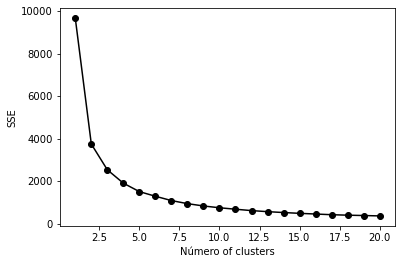

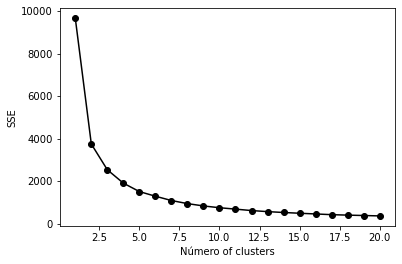

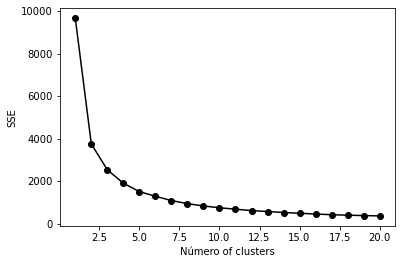

In [49]:
for i in R_FM_Customers.keys():
       R_FM_Func.Curva_kmeans(R_FM_Customers['Activo'],[ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)',
       '$(F \times W_F + M \times W_M)$'])

### Clustering 

In [51]:
A_Clust=[]
for i in R_FM_Customers.keys():
    A_Clust.append(R_FM_Func.def_Col_cluster(
    R_FM_Customers[i],[ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)',
       '$(F \times W_F + M \times W_M)$'],5
    ))
A_Clust.head()

ValueError: Input contains infinity or a value too large for dtype('float64').